# Direct reduction of iron ore with hydrogen : Modelling 


## Assumptions for the modelling 

1. All calculations are done for the production of 1 ton of liquid steel from the system.
2. 5$\%$impurities are present in the raw materials.The assumption is consistent with the plant data available in the literature.Primary components of the impurities are silica and alumina.
3. The iron ore pellets are heated from ambient temperature to 800 C,through an electrical heater of efficiency, $\eta_{thermal}=0.85$.
4. Output from the shaft furnace would be metallic Fe and FeO.Remaining FeO will be reduced to pure iron in the electric arc furnace. Although, in practice some amount of FeO does not get reduced and becomes a part of the EAF slag.
5. Hydrogen at high temperature is considered to be the source of energy for the reactions inside the shaft furnace.
6.  The flow rate of hydrogen is considered to be higher than the stoichiometric requirements.
7.  Hydrogen produced from electrolysers are heated in an electrical heater with an efficiency of $\eta_{thermal}=0.7$.

8. DRI stream exiting the shaft furnace is considered to be at a temperature of  800\textdegree C).
9. The exhaust gas stream is assumed to be composed of hydrogen and water.The waste stream enthalpy varies with exhaust gas temperature and $\lambda_{h{2}}$.
10.  Energy required to separate hydrogen and water from the waste stream is not considered in the present calculations.
11. 100\% DRI is fed into the furnace without any scrap. 
12.  Hot DRI is fed into the DRI at 700 C as it saves considerable amount of electrical energy in the EAF.
13.  Natural gas is not used for heating the material as its the general practice to use natural gas with 
     scrap for initial heating.
14.  As DRI is reduced only with Hydrogen, it is assumed that it does not contain any Fe3C
15.  Carbon is added into the EAF to reduce the remaining FeO in the mix and also to generate CO for froth formation,which is essential for the operation of the EAF and to extend the life of the graphite electrodes and the refractory.
16.  CaO and MgO are added in the EAF as slag formers to maintain the basicity of the EAF.The weight of CaO and MgO used are according to data published in the literature .

17. Efficiency parameters used in the model for electrical and chemical energy are according to the reference .
18.  Latent heat of fusion is added in the enthalpy calculations for Fe and FeO.


<img src="HDRI_electrolysis_08_10.png">

# Mass and energy balance for a direct reduction shaft furnace 

Iron ore pellets containing upto 5% impurities eneter the direct shaft furnace after being heated to the reaction temperature of $800 C $ by electrical heaters.


${M_{Fe_{2}O_{3}}=\frac{1}{({Fe_{2}O_{3}}_{pure}*FeO_{ratio})}}$ <br />
Where, <br />
$M_{Fe_{2}O_{3}}$= Mass flow rate of iron ore for production of 1 ton of liquid steel in kg/tls<br />
${Fe_{2}O_{3}}_{pure}$=Percentage of pure iron ore in the iron ore stream (assumed to be 0.95)<br />
$FeO_{ratio}$=Ratio of molecular weight of iron contained in iron oxide (0.7) <br />


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
alpha=[0.94,0.93,0.92,0.91,0.90,0.89] # Metallization rates considered for the DRI reduction shaft furnace
fe2O3_pure=0.95 # Percentage of hematite in the raw material. 5% Impurities are considered in the iron ore which gets transferred into the EAF as it is 
Fe_O_ratio=112/160 # percentage of iron in one mole of iron ore 
hem_weight=1/(fe2O3_pure*Fe_O_ratio)# Weight of total iron ore fed to the DRI and EAF to get 1 ton of liquid steel
Feo_per=[]
for i in range(len(alpha)):
    Feo_per.append(hem_weight*fe2O3_pure*(1-alpha[i])*Fe_O_ratio) # Depends on the slag content , metallization rate 
print("FeO percentage :",Feo_per)
Feo_weight=[]
for i in range(len(Feo_per)):
    Feo_weight.append(Feo_per[i]*hem_weight)
    

SIO2_per=3 # Percentage of silica in the Slag 
Al2O3_per=2 #Percentage of alumina in the Slag
#CAO_percentage=4.5 #Percentage of lime added in the EAF slag is higher for DRI as the gangue content is higher making the system acidic
#MGO_percentage=0.53 #Percentage of Magnesium oxide in the EAF slag
SIO2_weight=(hem_weight*SIO2_per)/100 # SiO2 weight in ton 
AL2O3_weight=(hem_weight*Al2O3_per)/100 # weight in ton
print("Weight of iron ore fed to the shaft furnace to produce one ton of liquid steel in the DRI_EAF process :",hem_weight)


FeO percentage : [0.06000000000000005, 0.06999999999999995, 0.07999999999999996, 0.08999999999999997, 0.09999999999999996, 0.10999999999999999]
Weight of iron ore fed to the shaft furnace to produce one ton of liquid steel in the DRI_EAF process : 1.5037593984962407


In [2]:
m_fe2o3=hem_weight # mass flow rate of iron ore into the shaft 
m_sio2=SIO2_weight # mass flow rate of Silica into the shaft 
m_al2o3=AL2O3_weight # mass flow rate of Alumina into the shaft 
m_feo=Feo_weight # mass flow rate of Wustite from the DRI shaft furnace to the EAF


Mass flow rate of iron ore into the shaft : $M_{Fe_{2}O_{3}}$  <br />
Mass flow rate of Silica into the shaft : $M_{Sio_{2}}$   <br /> 
Mass flow rate of Alumina into the shaft : $M_{Al_{2}O_{3}}$ : <br />
Mass flow rate of Wustite from the DRI shaft furnace to the EAF : $M_{FeO}$ <br />
Stoichiometric Mass flow rate of hydrogen inside the DRI shaft furnace : $M_{H_{2}}$ <br />
Actual Mass flow rate of hydrogen inside the DRI shaft furnace : $M_{H_{2 actual}}$ <br />


## Molecular weight of raw materials fed to the shaft furnace

In [3]:
mol_weight_fe=55.845 #in grams
mol_weight_fe2o3=159.688 #in grams 
mol_weight_Sio2=60.0843 #in grams
mol_weight_al2o3=101.9613 #in grams
mol_weight_feo=71.844 #in grams
mol_weight_H2=2.01588 #in grams
mol_weight_H2O=18.0153 #in grams

## Energy required to heat the raw materials to 800 C

The raw materials (ore and impurities) are both heated from ambient temperature to 800 C, which is the reaction temperature.The heat is provided through electrical heaters at an electrical efficiency of 0.85. The input temperature of the pellets is considered to be 298 K and the exit temperature to be 1073 K. 

In [4]:
T1_hem=298 # K Ambient temperature / Temperature of the incoming iron pellets
T2_hem=1073 # K Temperature of the iron ore for reduction process
T1_sio2=298#Ambient temperature / Temperature of the incoming iron pellets
T2_sio2=1073 # Temperature of the iron ore for reduction process
T1_al2o3=298 #Ambient temperature / Temperature of the incoming iron pellets
T2_al2o3=1073 #Temperature of the iron ore for reduction process

# Enthalpy calculations for the different raw materials fed to the shaft furnace.

def fe2o3_enthalpy_1(T):# T1 and T2 should be in the range of 298-950 K 
    t=T/1000
    A=93.43834
    B=108.3577
    C=-50.86447
    D=25.58683
    E=-1.611330
    F=-863.2094   
    G=161.0719
    H=-825.5032 
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
def fe2o3_enthalpy_2(T):# T1 and T2 should be in the range of 1050-2500 K 
    t=T/1000
    A=150.6240
    B=0
    C=0
    D=0
    E=0
    F=-875.6066
    G=252.8814
    H=-825.5032
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
def fe2o3_enthalpy_3(T):# T1 and T2 should be in the range of 1050-2500 K 
    t=T/1000
    A=110.9362
    B=32.04714
    C=-9.192333
    D=0.901506
    E=5.433677
    F=-843.1471
    G=228.3548
    H=-825.5032
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
if T2_hem in range(298,951):
    Fe2o3_En_per_mol=fe2o3_enthalpy_1(T2_hem)-fe2o3_enthalpy_1(T1_hem)
elif T2_hem in range(951,1051):
     Fe2o3_En_per_mol=fe2o3_enthalpy_2(T2_hem)-fe2o3_enthalpy_1(T1_hem)
elif T2_hem in range(1051,2501):
     Fe2o3_En_per_mol=fe2o3_enthalpy_3(T2_hem)-fe2o3_enthalpy_1(T1_hem)
mol_per_ton_Fe2o3=1000000/mol_weight_fe2o3 # 1 ton= 10^6 grams 
Fe2o3_En_per_ton=Fe2o3_En_per_mol*mol_per_ton_Fe2o3
H_Fe2o3=((Fe2o3_En_per_ton))*m_fe2o3 # Energy consumption in KJ
print("Enthalpy of Iron ore in KJ/kg :",Fe2o3_En_per_ton/1000)
print(" Enthalpy of iron ore in kJ :",H_Fe2o3) 

""" Energy required to heat the impurities from 298 K to 800 K"""
def sio2_enthalpy(T):
    t=T/1000
    A=58.75
    B=10.279
    C=-0.131384
    D=0.025210
    E=0.025601
    F=-929.3292
    G=105.8092
    H=-910.8568   
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
mol_weight_Sio2=60.0843 #in grams
#H_f=(910.86 /60.0843)*1000 # Melting enthalpy of SiO2 is 1710 C
H_T1_sio2=sio2_enthalpy(T1_sio2) # Enthalpy of iron ore at the input of the DRI shaft furnace
H_T2_sio2=sio2_enthalpy(T2_sio2) # Enthalpy of molten iron at the reaction temperature
En_per_mol_sio2=H_T2_sio2-H_T1_sio2
    #print("Energy per mol",En_per_mol)
mol_per_ton_sio2=1000000/mol_weight_Sio2# 1 ton= 10^6 grams 
## Energy per ton of SiO2 multiplied by the weight of sio2 in the solid stream
En_sio2=(En_per_mol_sio2*mol_per_ton_sio2)*m_sio2 
# H_f needs to be added only when there is a conversion from solid to liquid 
En_total_sio2=En_sio2 
print("Enthalpy of sio2 in KJ :",En_sio2)


"""Reference : https://webbook.nist.gov/cgi/cbook.cgi?ID=C1344281&Mask=2"""
def Al2O3_enthalpy(T):
    t=T/1000
    A=106.0880
    B=36.33740
    C=-13.86730
    D=2.141221
    E=-3.133231
    F=-1705.970
    G=153.9350
    H=-1662.300  
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
mol_weight_al2o3=101.9613 #in grams
#H_f=(1675.69 /mol_weight_al2o3)*1000 # Melting point of alumina is 2073 C
H_T1_al2o3=Al2O3_enthalpy(T1_al2o3) # Enthalpy of DRI at the input 
H_T2_al2o3=Al2O3_enthalpy(T2_al2o3) # Enthalpy of molten steel at the output
En_per_mol_al2o3=H_T2_al2o3-H_T1_al2o3
#print("Energy per mole al2o3",En_per_mol_al2o3)

mol_per_ton_al2o3=1000000/mol_weight_al2o3 # 1 ton= 10^6 grams 
En_al2o3=En_per_mol_al2o3*mol_per_ton_al2o3*m_al2o3 # Energy per ton of Al2O3 multiplied by the weight of Al2O3
En_total_al2o3=En_al2o3
print("Energy to heat aluminium oxide:",En_al2o3) #In Kj/ton




Enthalpy of Iron ore in KJ/kg : 697.1709070984995
 Enthalpy of iron ore in kJ : 1048377.3039075182
Enthalpy of sio2 in KJ : 38299.203208586274
Energy to heat aluminium oxide: 26265.60633766063


### Electrical energy required for heating the raw materials

${EL_{energy}=\frac{M_{Fe_{2}O_{3}}*((h_{Fe_{2}O_{3}})_{T_{reactor}}-(h_{Fe_{2}O_{3}})_{T_{ambient}} )}{\eta_{el}}}$ <br />
Where,<br />
 $EL_{energy}$= Electrical energy required for heating the pellets in kJ <br />
 $(h_{Fe_{2}O_{3}})_{T_{reactor}}$= Specific enthalpy of iron ore at reactor temperature in kJ/kg <br />
 $(h_{Fe_{2}O_{3}})_{T_{ambient}}$= Specific enthalpy of iron ore at ambient temperature in kJ/kg <br />
 $\eta_{el}$= Efficiency of the electrical heater <br />
 

In [5]:
eta_el_heat=0.85 # Electrical heating efficiency 
H_ore_heat=(H_Fe2o3+En_sio2+En_al2o3)/eta_el_heat # In KJ
print("Electrical energy required for heating the iron ore to reduction temperature (in KJ):",H_ore_heat) # in KJ
print("Electrical energy required for heating the iron ore to reduction temperature (in KWH):",H_ore_heat/3600) # in KWh

Electrical energy required for heating the iron ore to reduction temperature (in KJ): 1309343.6628867825
Electrical energy required for heating the iron ore to reduction temperature (in KWH): 363.70657302410626


## Stochiometric calculations for the amount of Hydrogen required for reduction of iron

Iron ore is reducd by hydrogen at a temperature of 800-900 C in an endothermic reaction using 99.5 kJ/mol.<br />
$Fe_{2}O_{3}+ 3H_{2}---> 2Fe + 3H_{2}O$

In [6]:
H2_per_mol=3/2 # to produce 1 mole of iron 2/3 rd mole of hydrogen are required
H2_weight=(H2_per_mol)*mol_weight_H2 # Weight of H2 for producing one mole of Fe in gms
mol_per_ton_fe=(1000000)/mol_weight_fe # Number of moles in 1 ton of Fe
H2_per_ton=(H2_weight*mol_per_ton_fe)/1000 # Weight of hydrogen in kg to reduce 1 ton of Fe2O3

print("Hydrogen required to produce 1 ton of iron in kg/ton of iron:", H2_per_ton)


Hydrogen required to produce 1 ton of iron in kg/ton of iron: 54.146655922643035


In [7]:
m_h2= H2_per_ton #Mass flow rate of hydrogen for production of one ton of steel.

 ### Hydrogen required for reduction of iron oxide for  1 ton of Fe production (Actual)
 Actual amount of hydrogen entering the shaft furnace is higher than the stoichiometric value.The ration between the actual value and the stoichiometric value is defined as lambda_h2 in these calculations. The graph below shows the variation of mass flow rate of hydrogen with lamda_h2. 

In [8]:
lambda_h2=[]
H2_actual_ts=[]
# Iteratively add values to the list of lambda_h2 to see the effect of increasing lambda_h2
for i in range(2,11):
    lambda_h2.append(i/2) 
# Amount of actual hydrogen required for reduction of iron oxide to produce 1 ton of iron
for i in range(len(lambda_h2)):
    H2_actual_ts.append(m_h2*lambda_h2[i]) 
print("Amount of actual hydrogen required for reduction of iron oxide to produce 1 ton of iron in kg :",H2_actual_ts,lambda_h2)

Amount of actual hydrogen required for reduction of iron oxide to produce 1 ton of iron in kg : [54.146655922643035, 81.21998388396455, 108.29331184528607, 135.3666398066076, 162.4399677679291, 189.51329572925061, 216.58662369057214, 243.65995165189366, 270.7332796132152] [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


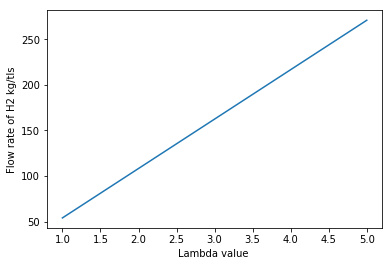

In [9]:
plt.plot(lambda_h2,H2_actual_ts)
plt.xlabel('Lambda value ')
plt.ylabel('Flow rate of H2 kg/tls')
plt.savefig('Flow rate of hydrogen variation with lambda.svg')
plt.savefig('Flow rate of hydrogen variation with lambda.pdf')
plt.show()


## Mass flow rate of waste gases from the shaft furnace 

It is assumed that the waste gas stream is a mixture of unreacted hydrogen and water/steam produced from the reduction reaction. Amount of water produced would depend on the metallization rate. For ease of calculations, it is assumed that metallization is complete.Amount of unused hydrogen in the waste stream depends on the amount of hydrogen entering the shaft furnace or lambda_h2.

Hydrogen is separated from the waste gas stream is mixed with the incoming hydrogen from the electrolyser.The mixed stream is heated to a temperature of 800-900 C and is fed to the shaft furnace.Water separated from the waste stream is fed back to the electrolyser.Hydrogen can be fed back to the shaft furnace from the storage to provide flexibility to the grid.It is not considered in the calculations as only steady state calculations are done in this analysis. 

<img src="Electricheater_h2.png">

In [10]:
# Mass flow rate of water in the waste stream per ton of steel production

water_tls=((3*mol_weight_H2O)/(2*mol_weight_fe))*1000
print("Amount of water in the waste stream per ton of steel production in kg/tls",water_tls) #kg/tls
## Calculation of the hydrogen in the waste stream 
m_h2_waste_stream=[]
m_water_tls=[]
for j in range(len(lambda_h2)):
    m_h2_waste_stream.append(m_h2*(lambda_h2[j]-1)) #Kg/tls
    m_water_tls.append(water_tls)
    # The value varies with input flow rate of hydrogen inside the shaft furnace
print("Amount of hydrogen in the waste stream per ton of steel production in kg/tls",m_h2_waste_stream)


Amount of water in the waste stream per ton of steel production in kg/tls 483.89202256244965
Amount of hydrogen in the waste stream per ton of steel production in kg/tls [0.0, 27.073327961321517, 54.146655922643035, 81.21998388396455, 108.29331184528607, 135.3666398066076, 162.4399677679291, 189.51329572925061, 216.58662369057214]


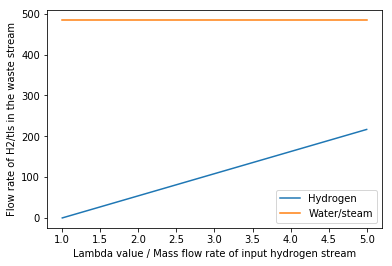

In [11]:
plt.plot(lambda_h2,m_h2_waste_stream,label='Hydrogen')
plt.plot(lambda_h2,m_water_tls,label='Water/steam')
plt.xlabel('Lambda value / Mass flow rate of input hydrogen stream')
plt.ylabel('Flow rate of H2/tls in the waste stream')
plt.savefig('Flow rate of Waste stream variation with lambda.svg')
plt.savefig('Flow rate of Waste stream variation with lambda.pdf')
plt.legend()
plt.show()


## Energy contained in the waste stream

Temperature of the waste gas stream could vary according to the input temperature and flow rate of the hydrogen stream.Plant data from Syngas based DRI shaft furnace show that the temperature could vary from 275 C to 400 C.Higher temperatures are witnessed when the content of CO in the Syngas is higher.The reduction reaction between heamtite and CO is exothermic.On the other hand , hyrogen reduction of hematite is endothermic.We could assume a temperature of 350 C for the calculation of energy content in the waste gas stream.Hydrogen from the waste stream is fed back to the electrical heating system , where it gets mixed with hydrogen coming from the electrolyser output.Energy required to separate the two streams has not been considered in the present calculations. 

In [12]:
T_waste=623 # K Temperature of the exhaust gas leaving the reduction shaft furnace

### Enthalpy contained in water stream

In [13]:
def H2O_enthalpy(T):# 500 -1700 K reference :https://webbook.nist.gov/cgi/cbook.cgi?ID=C7732185&Mask=1
    t=T/1000
    A=30.09200
    B=6.832514
    C=6.793435
    D=-2.534480
    E=0.082139
    F=-250.8810
    G=223.3967
    H=-241.8264
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
H2O_en_per_mol=H2O_enthalpy(T_waste)
mol_per_kg_H2O=1000/mol_weight_H2O # Number of moles in one kg
H2O_en_per_kg=(mol_per_kg_H2O)*(H2O_en_per_mol)

print("Enthalpy per Kg of Water in kJ/kg :",H2O_en_per_kg)
# Multiplying the specific enthalpy with mass flow rate 
h2o_enthalpy=water_tls*H2O_en_per_kg
print("Enthalpy in water stream per Kg of steel in kJ:",h2o_enthalpy)


Enthalpy per Kg of Water in kJ/kg : 629.405546043845
Enthalpy in water stream per Kg of steel in kJ: 304564.3226871792


### Enthalpy in the hydrogen from the waste stream

In [14]:
def H2_enthalpy_1(T):# T1 and T2 should be in the range of 298-1000 K 
    t=T/1000
    A=33.066718
    B=-11.363417
    C=11.432816
    D=-2.772874
    E=-0.158558
    F=-9.980797
    G=172.707974
    H=0
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
H2_en_per_mol=H2_enthalpy_1(T_waste)     
#mol_per_kg_H2=(1000/mol_weight_H2) # Number of moles in one kg 
H2_en_per_kg=((1000/mol_weight_H2)*H2_en_per_mol)
h2_en_tls=[]
for i in range(len(m_h2_waste_stream)):
    h2_en_tls.append(H2_en_per_kg*(m_h2_waste_stream[i]))
print("Enthalpy per Kg of hydrogen in kJ/kg :",H2_en_per_kg)
print("Enthalpy per Kg of hydrogen in kJ/kg :",h2_en_tls)


Enthalpy per Kg of hydrogen in kJ/kg : 4705.692808769396
Enthalpy per Kg of hydrogen in kJ/kg : [0.0, 127398.76469704608, 254797.52939409215, 382196.2940911382, 509595.0587881843, 636993.8234852304, 764392.5881822763, 891791.3528793225, 1019190.1175763686]


In [15]:
waste_enth=[]
for i in range(len(h2_en_tls)):
    waste_enth.append((h2_en_tls[i]+h2o_enthalpy)/3600)

### Plot for the Hydrogen energy variation

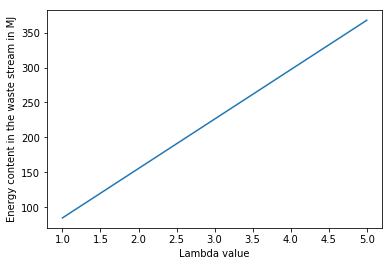

In [16]:
plt.plot(lambda_h2,waste_enth)
plt.xlabel('Lambda value')
plt.ylabel('Energy content in the waste stream in MJ')
plt.savefig('Energy content in waste stream with lambda.svg')
plt.savefig('Energy content in waste stream with lambda.pdf')
plt.show()

## Energy input to the hydrogen stream

Hydrogen reduces the iron oxide pellets by converting them into Fe3O4---FeO----Fe.The optimal reaction temperature is 800 C (according to the experimental studies carried out to study the reaction kinetics).It is assumed that the heat for the reaction is transferred from the high temperature hydrogen.Different input temperatures are considered to see the impact of inlet temperature on the overall energy consumption of the furnace. Alkaline and PEM electrolysers produce hydrogen at a temperature of 70-80 C.Reduction of iron oxide is carried out a temperature of 800-900 C.In this section we calculate the amount of heat required to heat the hydrogen exiting the electrolyser to the reaction temperature.The value depends on the flow rate of hydrogen from the elctrolyser and from the waste gas stream.Temperature of the hydrogen from the waste stream needs to be increased from 623 K to 1073-1273 K, whereas , temperature of the hydrogen from the elctrolyser needs to be increased from 343 K to 1073-1273 K.  <br />
$
M_{h_{2_{actual}}} =M_{h_{2_{electrolyser}}} + M_{h_{2_{waste stream}}}  $ <br />

$T_{h_{2_{electrolyser}}}=343 K$  <br />

$T_{h_{2_{waste stream}}}=623 K$ <br />

$M_{h_{2_{electolyser}}}=M_{h_{2_{actual}}}- M_{h_{2_{waste stream}}} $

$T_{h_{2_{input}}}=1073 K -1273 K $


### Mass flow rate of hydrogen from the electrolyser

In [17]:
m_h2_electrolyser=[]
for i in range(len(H2_actual_ts)):
    m_h2_electrolyser.append(H2_actual_ts[i]-m_h2_waste_stream[i])
T_electrolyser=343 # output hydrogen at a temperature of 70 C


### Energy required to heat the hydrogen stream to 1073-1273 K

In [18]:
T_h2_input=[1073,1098,1123,1148,1173,1198,1223,1248,1273]

In [19]:
def H2_enthalpy_1(T):# T1 and T2 should be in the range of 298-1000 K 
    t=T/1000
    A=33.066718
    B=-11.363417
    C=11.432816
    D=-2.772874
    E=-0.158558
    F=-9.980797
    G=172.707974
    H=0
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t

def H2_enthalpy_2(T):# T1 and T2 should be in the range of 1050-2500 K 
    t=T/1000
    A=18.563083
    B=12.257357
    C=-2.859786
    D=0.268238
    E=1.977990
    F=-1.147438
    G=156.288133
    H=0
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
H2_in_en_per_mol=[]
H2_in_en_per_kg=[]
for i in range(len(T_h2_input)):
    if T_h2_input[i] in range(298,1001):
        H2_in_en_per_mol.append(H2_enthalpy_1(T_h2_input[i]))
    elif T_h2_input[i] in range(1001,2501):
        H2_in_en_per_mol.append(H2_enthalpy_2(T_h2_input[i]))
  
    mol_per_kg_H2=1000/mol_weight_H2 # Number of moles in one kg 

for j in range(len(T_h2_input)):
    H2_in_en_per_kg.append(mol_per_kg_H2*H2_in_en_per_mol[j])
print("Enthalpy per Kg of input  hydrogen at 1073 K in kJ/kg :",H2_in_en_per_kg)


Enthalpy per Kg of input  hydrogen at 1073 K in kJ/kg : [11357.178654536647, 11735.68092099354, 12115.410167028142, 12496.396476478576, 12878.665081966752, 13262.236903617199, 13647.129021702476, 14033.355092480218, 14420.925715031339]


#### H2 enthalpy at 623 K and 343 K

In [20]:
def H2_enthalpy_1(T):# T1 and T2 should be in the range of 298-1000 K 
    t=T/1000
    A=33.066718
    B=-11.363417
    C=11.432816
    D=-2.772874
    E=-0.158558
    F=-9.980797
    G=172.707974
    H=0
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t

In [21]:
en_h2_waste=(H2_enthalpy_1(T_waste)*(1000/mol_weight_H2))
en_h2_electrolyser=(H2_enthalpy_1(T_electrolyser)*(1000/mol_weight_H2))

### Fixing the output temperature to 1273 K

In [22]:
total_heat_per_kg=[]
for i in range(len(H2_in_en_per_kg)):
    total_heat_per_kg.append((H2_in_en_per_kg[8]*H2_actual_ts[i])-(en_h2_waste*m_h2_waste_stream[i])-(en_h2_electrolyser*m_h2_electrolyser[i]))
eta_heat=0.7
total_heat=[]
for i in range(len(total_heat_per_kg)):
    total_heat.append(total_heat_per_kg[i]/(3600*eta_heat))

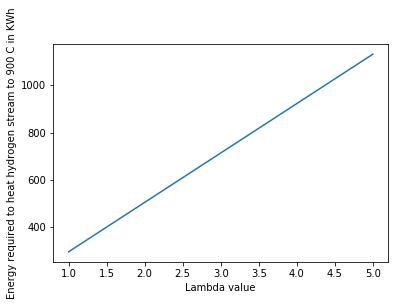

In [23]:
plt.plot(lambda_h2,total_heat)
plt.xlabel('Lambda value')
plt.ylabel('Energy required to heat hydrogen stream to 900 C in KWh')
plt.savefig('Energy required to heat hydrogen stream to 900 C in kJ.svg')
plt.savefig('Energy required to heat hydrogen stream to 900 C in kJ.pdf')
plt.show()

## Reaction enthalpy calculation

In [24]:
fe2o3_hem = 1
h2_hem = 3
fe_hem = 2
h2o_hem = 3
dHb_fe2o3 = -825500 #		 '[J/mol] formation enthalpy of hematite
dHb_w = -242000 #	 '[J/mol] formation enthalpy of water (gaseous)
dHr_hem = (dHb_w * h2o_hem) - dHb_fe2o3 #'[J/mol] reaction enthalpy
print("Reaction enthalpy in J/mol: ",dHr_hem) 
dhr_hem_kj=dHr_hem/1000 # reaction enthalpy kJ/mol
print("Reaction enthalpy in kJ/mol: ",dhr_hem_kj) 
dhr_hem_kj_kg=(dhr_hem_kj/mol_weight_fe2o3)*1000 # reaction ethalpy in kj/kg
print("Reaction enthalpy in kJj/Kg of hematite: ",dhr_hem_kj_kg)
dhr_hem_kj_ton=dhr_hem_kj_kg*1000
print("Reaction enthalpy in kJ per ton of heamtite : ",dhr_hem_kj_ton) # kJ/ton of fe2O3 
# Amount of heat to be supplied in kJ for production of 1 ton of molten steel
dhr_per_ts=dhr_hem_kj_ton*m_fe2o3*fe2O3_pure
print("Reaction enthalpy in kJ/ton of liquid steel:",dhr_per_ts) 


Reaction enthalpy in J/mol:  99500
Reaction enthalpy in kJ/mol:  99.5
Reaction enthalpy in kJj/Kg of hematite:  623.0900255498221
Reaction enthalpy in kJ per ton of heamtite :  623090.0255498221
Reaction enthalpy in kJ/ton of liquid steel: 890128.6079283174


## Energy contained in the solid stream exiting the DRI
It is assumed that the solid stream is a mixture of iron, iron oxide and impurities such as silica and alumina. The solid stream exits the reactor at a temperature of 800 C. 

In [25]:
"""Enthalpy of the residual FeO in the slag stream : https://webbook.nist.gov/cgi/cbook.cgi?ID=C1345251&Mask=2"""
# The constants are used for a temperature range of 298-1650 K 

T_dri_exit=1073 # Exit temperature of the FeO stream contained in the solid stream exiting the reactor

mol_per_ton_feo=1000000/mol_weight_feo# 1 ton= 10^6 grams

def feo_enthalpy(T):
    t=T/1000
    A=45.75120
    B=18.78553
    C=-5.952201
    D=0.852779
    E=-0.081265
    F=-286.7429
    G=110.3120
    H=-272.0441
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
En_per_mol_feo=(feo_enthalpy(T_dri_exit)) 

En_per_ton_feo=(En_per_mol_feo*mol_per_ton_feo) 

En_feo=(En_per_ton_feo*Feo_weight[0])
print(En_feo)
        #print("Temperature",T_dri_exit[j])
        #print("alpha",alpha[i])
#print("Energy per mole feo :",En_per_mol_feo)
#print("Energy per ton feo :",En_per_ton_feo)
#print("Energy contained in the feo stream exiting the reactor",En_feo) #In Kj/tls

### Energy contained in the iron ore stream

def fe_enthalpy(T):
    t=T/1000
    A=23.97449
    B=8.367750
    C=0.000277
    D=-0.000088
    E=-0.000005
    F=0.268027
    G=62.06336
    H=7.788015    
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
#H_f=247000 # Melting enthalpy of steel per ton in Kj/ton https://materialsdata.nist.gov/bitstream/handle/11115/166/Thermophysical%20Properties.pdf?sequence=3
En_per_mol_fe=(fe_enthalpy(T_dri_exit))# Enthalpy of direct reduced iron at the output of the reactor
mol_per_ton_fe=1000000/mol_weight_fe # 1 ton= 10^6 grams
En_fe=(En_per_mol_fe*mol_per_ton_fe*m_fe2o3*fe2O3_pure*alpha[0]*Fe_O_ratio)
total_metal_en=(En_fe +En_feo)/3600
print("Total energy in the outgoing metallic stream in KWh",total_metal_en)

54144.46828539456
Total energy in the outgoing metallic stream in KWh 122.68152439776773


## Energy balance of the shaft furnace 
Energy input = hydrogen stream + raw material entering <br />
Energy outgoing= Off gas + reaction enthalpy + radiative losses + Outgoing metallic stream <br />


In [26]:
radiative_losses=(((lambda_h2[0]*H2_in_en_per_kg[0]*H2_per_ton) + (H_Fe2o3+En_sio2+En_al2o3))/3600)-((waste_enth[0]+(dhr_per_ts)/3600+total_metal_en))
print(radiative_losses)


25.430261073746237


[]

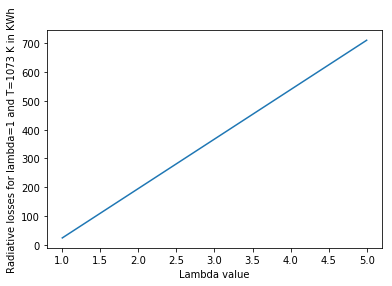

In [27]:
en_loss=[]
for i in range(len(lambda_h2)):
    en_loss.append((((lambda_h2[i]*H2_in_en_per_kg[0]*H2_per_ton) + (H_Fe2o3+En_sio2+En_al2o3)+(en_h2_waste*m_h2_waste_stream[i]))/3600)-((waste_enth[i]+(dhr_per_ts)/3600+total_metal_en)))
plt.plot(lambda_h2,en_loss,label='radiative losses')
plt.xlabel('Lambda value')
plt.ylabel('Radiative losses for lambda=1 and T=1073 K in KWh')
plt.savefig('Radiative losses for lambda=1 and T=1073 K in KWh.pdf')
plt.savefig('Radiative losses for lambda=1 and T=1073 K in KWh.svg')
plt.plot()

## Energy balance of the EAF

The modelling work is baseed on the  https://www.sciencedirect.com/science/article/pii/S036054421100524X. <br/>
**_EAF energy balance  - Equation 1_**<br/>


$\begin{equation} \label{Energy balance in EAF}\large E_{total}=E_{in}=\large \int_{\small charging}^{\small tapping} P_{\small electric} dt + \Delta H_{\small oxygen injection} + \Delta H_{\small ng_burners} = E_{out}=\Delta H_{\small steel }+ \Delta H_{\small slag } + \large\int\Delta H^._{\small off-gas}dt +\large\int\Delta Q^._{\small cooling}dt+\large\int\Delta Q^._{\small radiaitve losses}dt \end{equation}$<br/>

The Enthalpy that is heating up the melt and slag in a small time step $\Delta t$ is determined from the energy input from the electric arc , ($P_{electric}$), from oxidation reactions, and from the gas burners ($P_{ngburners})$. Equation 2 depicts the same in mathematical form : $<br/>

**_Energy balance -Equation 2_**


$\Delta E_{Total}=\large \int_{\small t}^{\small t+\Delta t}P_{elec}+ \int_{\small t}^{\small t+\Delta t}\sum_{i}^{n}m^._{oxidized,i}h_{oxidized,i}dt +\large \int_{\small t}^{\small t+\Delta t}P_{ng_burners}dt=\large \int_{\small T(t)}^{\small T( t+\Delta t)} h_{steel}m_{steel}dt + \large \int_{\small T(t)}^{\small T( t+\Delta t)}h_{slag}m_{slag}dt+\large \int_{\small t}^{\small t+\Delta t}P_{off-gas}dt+\large \int_{\small t}^{\small t+\Delta t}P_{cooling}dt + \large \int_{\small t}^{\small t+\Delta t}P_{other losses}dt$ $<br/>

Efficiency values for energy conversion for electric arc furnaces 

**_Electric arc -Equation 3_**


$\Delta H_{melt,el}=\eta_{el}\eta_{arc}\Large \int_{\small t}^{\small t+\Delta t}P_{elec}dt$ $<br/>


In this model , the value of $\eta_{el}\eta_{arc}$ has been taken to be 0.6 as the melting rate is lower for 100\% DRI than with scrap based mixture. $<br/>

Enthalpy portion that is transferred into the melt and the slag from the oxidation reactions which are exothermic.<br/> 

**_Chemical enthalpy -Equation 4_**<br/>



$\Delta H_{melt,chem}=\eta_{chem}\Large\int_{\small t}^{\small t+\Delta t}\sum_{i}^{n}m^._{oxidized,i}h_{oxidized,i}dt$ <br/>


$\eta_{chem}$ is considered to be 0.5 to 0.6 in this work.<br/>

Enthalpy transferred from the natural gas burners in the EAF is calculated as : <br/>

**_Natural gas burners calculations -Equation 5_**<br/>



$\Delta H_{melt,burners}=\eta_{burners}\Large \int_{\small t}^{\small t+\Delta t}P_{ng-burners}dt$<br/>



In the model, energy input from natural gas has not been considered as it is primarily used with scrap based EAF systems to provide initial heating and reducing the overall energy consumption of the EAF. <br/>


The terms quantifying the $\Delta H_{\small ng_burners},\Delta H^._{\small off-gas},\Delta Q^._{\small cooling},\Delta Q^._{\small radiaitve losses}  $ In Equation 1 can be ignored. The **losses are considered in the efficiency factors of the electric arc and  chemical enthalpy calculations**. Natural gas burners are not used for the 100 % DRI based EAF systems.  <br/>

Final expression of the energy balance can be represented by **_Equation : 6_**<br/>


$\Delta H_{melt}=\eta_{el}\eta_{arc}\int_{ t}^{t+\Delta t}P_{elec}dt + \eta_{chem}\int_{ t}^{ t+\Delta t}\sum_{i}^{n}m_{oxidized,i}h_{oxidized,i}dt = \int_{T(t)}^{T( t+\Delta t)} h_{steel}m_{steel}dt + \int_{T(t)}^{ T( t+\Delta t)}h_{slag}m_{slag}dt $



In [28]:
alpha=0.94 
# Metallization rate considered for the DRI reducer
Total_fe_content_percentage=0.95 
# 5% Impurities are considered in the iron 
#ore which gets transferred into the EAF as it is 
iron_ore=1/(alpha*Total_fe_content_percentage)
# Weight of total iron ore fed to the DRI and EAF to get 1 ton of liquid steel
Total_fe=iron_ore*Total_fe_content_percentage
Total_fe_metal=iron_ore*Total_fe_content_percentage*alpha
FEO_weight=Total_fe-Total_fe_metal
SIO2_percentage=2 
# Percentage of silica in the Slag 
Al2O3_percentage=1.7 
#Percentage of alumina in the Slag
CAO_percentage=4.5
#Percentage of lime added in the EAF slag is higher for DRI
#as the gangue content is higher making the system acidic
MGO_percentage=0.53
#Percentage of Magnesium oxide in the EAF slag
SIO2_weight=(iron_ore*SIO2_percentage)/100 # SiO2 weight in ton 
print(SIO2_weight*1000)
AL2O3_weight=(iron_ore*Al2O3_percentage)/100 # weight in ton
CAO_weight=(iron_ore*CAO_percentage)/100 #weioght in ton
#print(CAO_weight*1000)
MGO_weight=(iron_ore*MGO_percentage)/100 #weight in ton 
carbon_weight=8 
# Weight of carbon in Kg added per ton for reduction of remaining FeO and production of carbon monoxide in the EAF for froth making which is essential for the smooth functioning of then EAF
print("Weight of metallic iron",Total_fe_metal) #in ton
print("Weight of iron oxide",FEO_weight) # in ton

## input and tap temperatures
T1=873# # Temperature input to the EAF 
T2=1923 # Tap temperature of the molten steel 1650 C

## Chemical eneergy calculation from oxidation of gangue particles 
#for silica Si+O2-SiO2 8.94 kWh/kg of silicon
Si_weight=28.085 #g/mol
Silica_weight=60.08 #g/mol
Enthalpy_per_kg_si=8.94 #kWh/kg
Enthalpy_per_kg_sio2=Enthalpy_per_kg_si/(Silica_weight/Si_weight) #kWh/kg
Enthalpy_silica=(Enthalpy_per_kg_sio2)*SIO2_weight*1000 
#kWh Enthalpy per unit is multiplied by the mass of the silica in the mix
print("Enthalpy_silica",Enthalpy_silica)
# oxidation reaction of alumina
#2Al+0.5O2---Al2O3
Al_weight=26.982
Alumina_weight=101.9613
Enthalpy_per_kg_Al=5.29 #kWh/kg
Enthalpy_per_kg_Al2o3=Enthalpy_per_kg_Al/(Alumina_weight/(2*Al_weight))
Enthalpy_alumina=Enthalpy_per_kg_Al2o3*AL2O3_weight*1000
print("Enthalpy_alumina",Enthalpy_alumina)
## Endothermic reactions
##Solution enthalpy for carbon =0.62kWh/kgc
carbon_sol_enthalpy=0.62*carbon_weight
print("carbon_sol_enthalpy",carbon_sol_enthalpy)

## Reduction of iron oxide to iron FeO+C---Fe + CO
reduction_enthalpy=3.59 #kWh/kg of carbon
#lets conider that 70% of the FeO is converted into iron and rest remains in the slag
feo_reduced=(FEO_weight*0.7)*1000
feo_weight=71.845 #g/mol
c_weight=12 #g/mol
c_required=(c_weight/feo_weight)*feo_reduced
feo_red_enthalpy=c_required*reduction_enthalpy
print("carbon required",c_required)
print("Iron oxide reduction enthalpy",feo_red_enthalpy)
#Oxidation reaction of carbon with oxygen
c_remaining=carbon_weight-c_required
# Oxidation of carbon to carbon monoxide consider that remaining carbon is converted to CO
# reaction C+0.5 O2---- CO + 9.10 kWh/kg of carbon
CO_enthalpy=c_remaining*9.10 
# certain portion of the CO escapes from the furnace and is also converted into CO2
print("CO_enthalpy",CO_enthalpy) 
chemical_enthalpy=Enthalpy_silica+Enthalpy_alumina-feo_red_enthalpy+CO_enthalpy-carbon_sol_enthalpy
print("Chemical enthalpy",chemical_enthalpy)


# Reference : NIST https://webbook.nist.gov/cgi/cbook.cgi?ID=C7439896&Mask=2&Type=JANAFS&Table=on
def fe_enthalpy(T):
    t=T/1000
    A=23.97449
    B=8.367750
    C=0.000277
    D=-0.000088
    E=-0.000005
    F=0.268027
    G=62.06336
    H=7.788015    
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
H_f=247000 # Melting enthalpy of steel per ton in Kj/ton 
#https://materialsdata.nist.gov/bitstream/handle/11115/166/Thermophysical%20Properties.pdf?sequence=3
H_T1=fe_enthalpy(T1) # Enthalpy of DRI at the input 
H_T2=fe_enthalpy(T2) # Enthalpy of molten steel at the output
En_per_mol=H_T2-H_T1
print(En_per_mol)
mol_weight_fe=55.845 #in grams
mol_per_ton=1000000/mol_weight_fe # 1 ton= 10^6 grams 
En_per_ton=En_per_mol*mol_per_ton
print(En_per_ton) #In Kj/ton
H_fe=((En_per_ton+H_f)/3600)*Total_fe_metal# Specific energy consumption KWh)
print(H_fe) 

""" Energy contained in the slag"""
def sio2_enthalpy(T):
    t=T/1000
    A=58.75
    B=10.279
    C=-0.131384
    D=0.025210
    E=0.025601
    F=-929.3292
    G=105.8092
    H=-910.8568   
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
mol_weight_Sio2=60.0843 #in grams
#H_f=(910.86 /60.0843)*1000 # Melting enthalpy of SiO2 is 1710 C
H_T1=sio2_enthalpy(T1) # Enthalpy of DRI at the input 
H_T2=sio2_enthalpy(T2) # Enthalpy of molten steel at the output
En_per_mol=H_T2-H_T1
print("Energy per mol",En_per_mol)
mol_per_ton=1000000/mol_weight_Sio2# 1 ton= 10^6 grams 
En_per_ton=En_per_mol*mol_per_ton
En_total=En_per_ton # H_f needs to be added only when there is a conversion from solid to liquid 
print("Energy per ton in kJ",En_per_ton) #In Kj/ton
#print((En_total)/3600)# Specific energy consumption KWh)
H_SIO2=(En_total/3600)*(SIO2_weight)
print("Enthalpy change in kWh",H_SIO2)


"""Reference : https://webbook.nist.gov/cgi/cbook.cgi?ID=C1344281&Mask=2"""
def Al2O3_enthalpy(T):
    t=T/1000
    A=106.0880
    B=36.33740
    C=-13.86730
    D=2.141221
    E=-3.133231
    F=-1705.970
    G=153.9350
    H=-1662.300  
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
mol_weight_al2o3=101.9613 #in grams
#H_f=(1675.69 /mol_weight_al2o3)*1000 # Melting point of alumina is 2073 C
H_T1=Al2O3_enthalpy(T1) # Enthalpy of DRI at the input 
H_T2=Al2O3_enthalpy(T2) # Enthalpy of molten steel at the output
En_per_mol=H_T2-H_T1
print(En_per_mol)

mol_per_ton=1000000/mol_weight_al2o3# 1 ton= 10^6 grams 
En_per_ton=En_per_mol*mol_per_ton
En_total=En_per_ton
print("Energy per mol",En_per_ton) #In Kj/ton
#print((En_total)/3600)# Specific energy consumption KWh)
H_AL2O3=(En_total/3600)*(AL2O3_weight)
print("Enthalpy change in Al2o3 in EAF in kWH",H_AL2O3)

"""reference : https://webbook.nist.gov/cgi/cbook.cgi?ID=C1305788&Mask=2"""
def cao_enthalpy(T):
    t=T/1000
    A=49.95403
    B=4.887916
    C=-0.353056
    D=0.046187
    E=-0.825097
    F=-652.9718
    G=92.56096
    H=-635.0894
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
mol_weight_cao=56.077 #in grams
#H_f=(635.09 /mol_weight_cao)*1000 # Melting point of cao is 2572 C

H_T1=cao_enthalpy(T1) # Enthalpy of DRI at the input 
H_T2=cao_enthalpy(T2) # Enthalpy of molten steel at the output
En_per_mol=H_T2-H_T1
print(En_per_mol)

mol_per_ton=1000000/mol_weight_cao# 1 ton= 10^6 grams 
En_per_ton=En_per_mol*mol_per_ton
En_total=En_per_ton
print("Energy per mol",En_per_ton) #In Kj/ton
#print((En_total)/3600)# Specific energy consumption KWh)
H_cao=(En_total/3600)*(CAO_weight)
print("Enthalpy change in cao in EAF in kWH",H_cao)

def mgo_enthalpy(T):
    t=T/1000
    A=47.25995
    B=5.681621
    C=-0.872665
    D=0.104300
    E=-1.053955
    F=-619.1316
    G=76.46176
    H=-601.2408
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
mol_weight_mgo=40.3044 #in grams
#H_f=(601.24/mol_weight_mgo)*1000 # Melting point of Mgo is 2852 C
H_T1=mgo_enthalpy(T1) # Enthalpy of DRI at the input 
H_T2=mgo_enthalpy(T2) # Enthalpy of molten steel at the output
En_per_mol=H_T2-H_T1
print(En_per_mol)

mol_per_ton=1000000/mol_weight_mgo# 1 ton= 10^6 grams 
En_per_ton=En_per_mol*mol_per_ton
En_total=En_per_ton 
print("Energy per mol",En_per_ton) #In Kj/ton
#print((En_total)/3600)# Specific energy consumption KWh)
H_mgo=(En_total/3600)*(MGO_weight)
print("Enthalpy change in cao in EAF in kWh",H_mgo)


#Enthalpy contained in residual FeO in the slag stream : 
#https://webbook.nist.gov/cgi/cbook.cgi?ID=C1345251&Mask=2
# The constants are used for a temperature range of 298-1650 K and the 
#fusion enthalpy is added in the mix to account for the latent heat of fusion , 
#whcih is an endothermic reaction
def feo_enthalpy(T):
    t=T/1000
    A=45.75120
    B=18.78553
    C=-5.952201
    D=0.852779
    E=-0.081265
    F=-286.7429
    G=110.3120
    H=-272.0441
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
mol_weight_feo=71.844 #in grams
H_f=(272.04/mol_weight_feo)*1000 # Melting point of feo is 1650K
H_T1=feo_enthalpy(T1) # Enthalpy of DRI at the input 
H_T2=feo_enthalpy(T2) # Enthalpy of molten steel at the output
En_per_mol=H_T2-H_T1
print(En_per_mol)

mol_per_ton=1000000/mol_weight_feo# 1 ton= 10^6 grams 
En_per_ton=En_per_mol*mol_per_ton
En_total=En_per_ton+H_f
print("Energy per mol",En_per_ton) #In Kj/ton
#print((En_total)/3600)# Specific energy consumption KWh)
H_feo=(En_total/3600)*(FEO_weight-(feo_reduced/1000))
print("Enthalpy change in FeO in EAF in kWh",H_feo)

# Energy contained in the slag 
En_slag=H_SIO2+H_AL2O3+H_cao+H_mgo+H_feo
print(En_slag)
Energy_out=En_slag+H_fe
print(Energy_out) # in kWh


""" Final calculations for the electrical energy and the energy balance of the system"""

eta_chem=0.6 # Efficiency of heat transfer , 
#waste gases etc considered in this calculation
eta_el=0.6 # Efficiency of the transformer, arc 
#, heat transfer, cooling losses, waste gas stream taken into consideration
el_energy=(Energy_out-(eta_chem*chemical_enthalpy))/eta_el
print ("Electrical energy input in kWh/ton of liquid steel", el_energy)


22.39641657334827
Weight of metallic iron 1.0000000000000002
Weight of iron oxide 0.06382978723404253
Enthalpy_silica 93.59670495330602
Enthalpy_alumina 53.299348939792566
carbon_sol_enthalpy 4.96
carbon required 7.462874420849847
Iron oxide reduction enthalpy 26.79171917085095
CO_enthalpy 4.887842770266395
Chemical enthalpy 120.03217749251402
37.45653869353222
670723.2284632862
254.92311901757955
Energy per mol 76.59228954207788
Energy per ton in kJ 1274747.1393039094
Enthalpy change in kWh 7.930491099315102
139.9863931641221
Energy per mol 1372936.527526837
Enthalpy change in Al2o3 in EAF in kWH 7.260147122046856
58.50326035042531
Energy per mol 1043266.5861302371
Enthalpy change in cao in EAF in kWH 14.603395662517318
55.770217959395495
Energy per mol 1383725.299456027
Enthalpy change in cao in EAF in kWh 2.2812442724639
65.56589239354591
Energy per mol 912614.7262617047
Enthalpy change in FeO in EAF in kWh 4.874474807232005
36.94975296357518
291.87287198115473
Electrical energy inp

$\frac{n(n-1)}{2} $